<a href="https://colab.research.google.com/github/deeprajbrahma123/Dairy-Goods-Sales-Prediction-Neural-Network-ML-Models/blob/main/dairy_good_sales_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:#116AF0; color:#19180F; font-size:24px; font-family:Verdana; padding:14px; border: 5px solid #19180F;"> Table of Contents </div>

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
1. Data Preprocessing <br>
2. Feature Engineering<br>
3. Exploratory Data Analysis<br>
4. Model Selection<br>
5. Hyperparameter tuning<br>
6. Feature Importances<br>
7. Model Interpretation<br>

</div>


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
1. Data Preprocessing <br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Importing modules <br>
</div>

In [ ]:
# Install necessary libraries not available by default in Colab
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.4 MB/s eta 0:00:00


In [ ]:
# Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# To display plots inline
%matplotlib inline

# Filter the FutureWarning from sklearn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# For data preprocessing
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model selection and evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Machine learning models and ensemble methods
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing SHAP for model interpretability (if needed)
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# Load the dataset
df = pd.read_csv('dairy_dataset.csv')
print(df.head().to_string(index=False))

     Location  Total Land Area (acres)  Number of Cows Farm Size       Date  Product ID Product Name                Brand  Quantity (liters/kg)  Price per Unit  Total Value  Shelf Life (days) Storage Condition Production Date Expiration Date  Quantity Sold (liters/kg)  Price per Unit (sold)  Approx. Total Revenue(INR) Customer Location Sales Channel  Quantity in Stock (liters/kg)  Minimum Stock Threshold (liters/kg)  Reorder Quantity (liters/kg)
    Telangana                   310.84              96    Medium 2022-02-17           5    Ice Cream          Dodla Dairy                222.40           85.72   19064.1280                 25            Frozen      2021-12-27      2022-01-21                          7                  82.24                      575.68    Madhya Pradesh     Wholesale                            215                                19.55                         64.03
Uttar Pradesh                    19.19              44     Large 2021-12-01           1         Milk

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
3. Exploratory Data Analysis<br>
</div>

In [ ]:
df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Similarly, Descriptive statistics for categorical values are performed <br>
</div>

In [ ]:
df.describe(include='object')

,Location,Farm Size,Date,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,1278,10,11,5,1405,1441,15,3
top,Delhi,Large,2021-01-28,Curd,Amul,Refrigerated,2022-01-13,2019-07-27,Delhi,Retail
freq,525,1462,11,479,1053,2459,9,9,499,1478


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Plotting the correlation matrix <br>
</div>

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


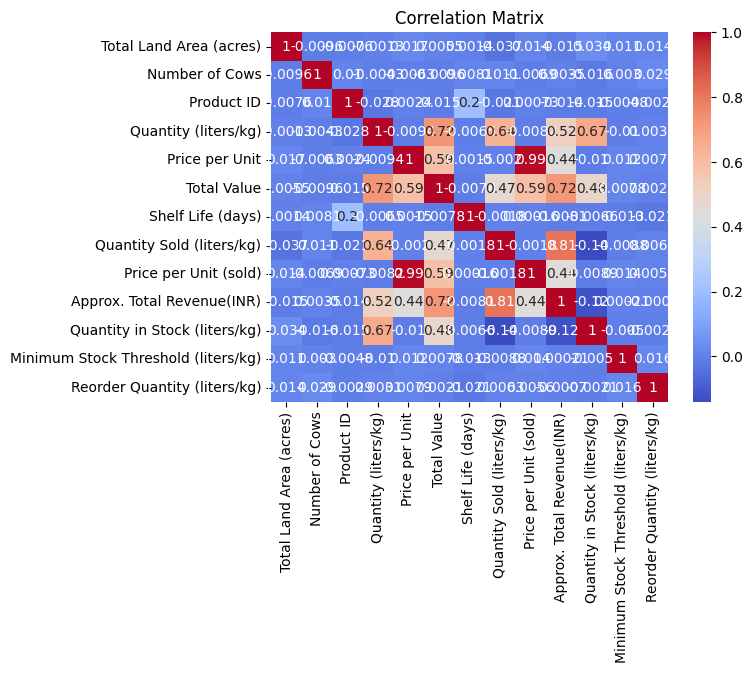

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Plotting the distribution of numerical variables <br>
</div>

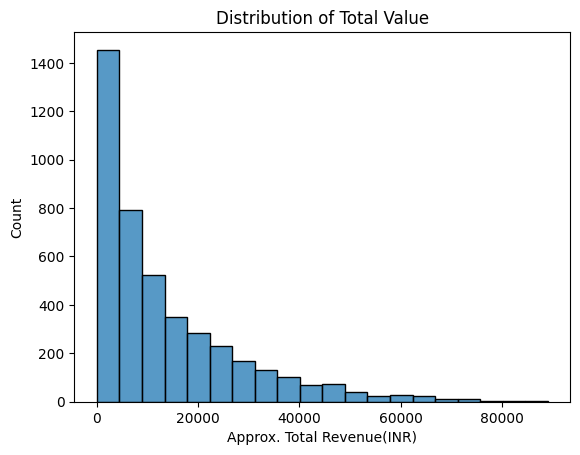

In [ ]:
sns.histplot(data=df, x='Approx. Total Revenue(INR)', bins=20)
plt.title('Distribution of Total Value')
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Plotting boxplot for numerical values <br>
</div>

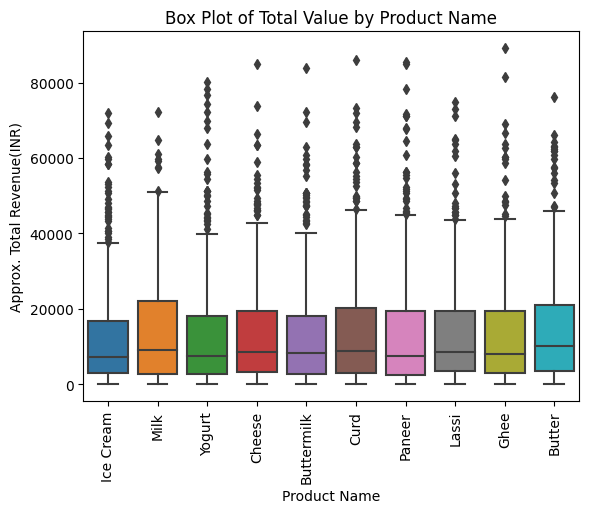

In [ ]:
sns.boxplot(data=df, x='Product Name', y='Approx. Total Revenue(INR)')
plt.title('Box Plot of Total Value by Product Name')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Plotting count plot for categorical variables <br>
</div>

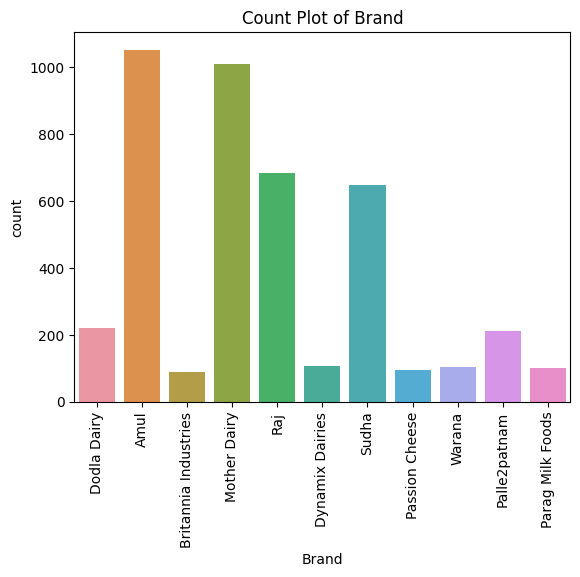

In [ ]:
sns.countplot(data=df, x='Brand')
plt.title('Count Plot of Brand')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Plotting scatter plot for two numerical variables<br>
</div>

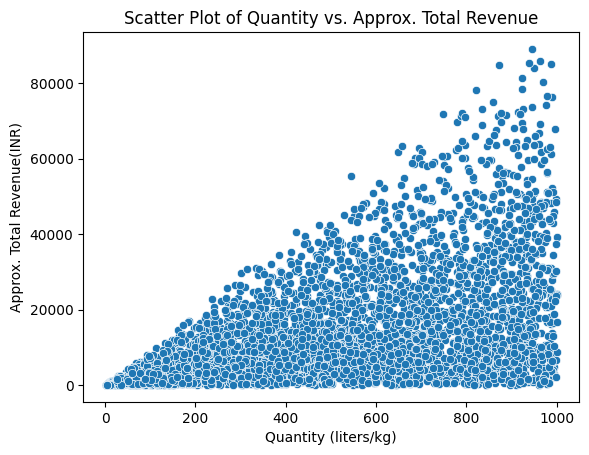

In [ ]:
sns.scatterplot(data=df, x='Quantity (liters/kg)', y='Approx. Total Revenue(INR)')
plt.title('Scatter Plot of Quantity vs. Approx. Total Revenue')
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Performing outlier detection <br>
</div>

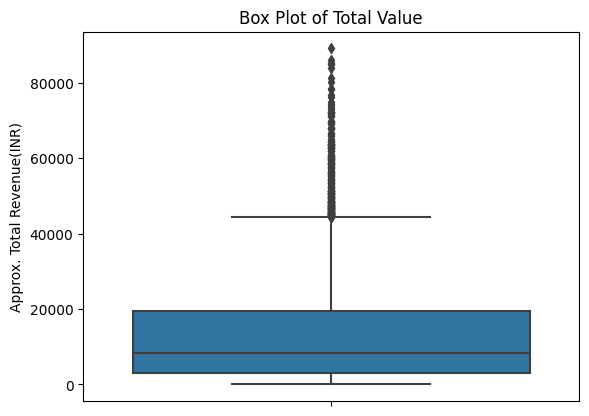

In [ ]:
sns.boxplot(data=df, y='Approx. Total Revenue(INR)')
plt.title('Box Plot of Total Value')
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Checking for missing values in the dataframe via heatmap<br>
</div>

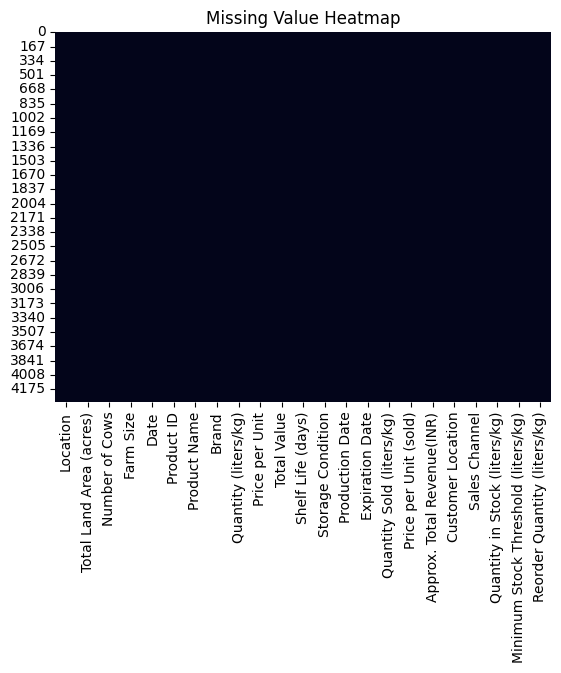

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
No missing values observed <br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Treatment of outliers using z-score is done to ensure non-tree models which are not robust to outliers perform well, too <br>
</div>

In [ ]:
z_scores = zscore(df['Approx. Total Revenue(INR)'])
df_no_outliers = df[(z_scores < 3)]

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Plotting the relationship between variables using barplot <br>
</div>

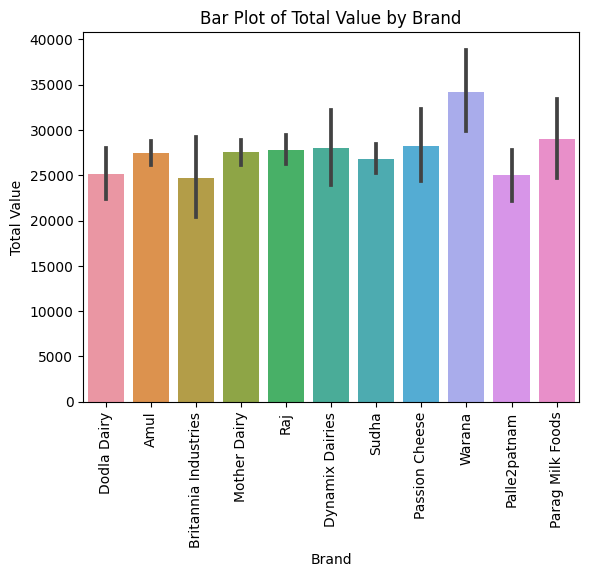

In [ ]:
sns.barplot(data=df, x='Brand', y='Total Value')
plt.title('Bar Plot of Total Value by Brand')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Plotting lineplot to decipher total value trend over time <br>
</div>

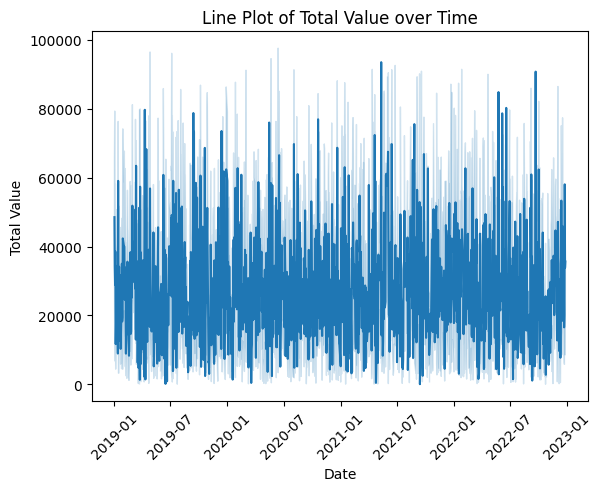

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x='Date', y='Total Value')
plt.title('Line Plot of Total Value over Time')
plt.xticks(rotation=45)
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Creating additional variable for EDA <br>
</div>

In [ ]:
# Convert the 'Date' column to a datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

# Now you can extract the month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Agreegating values by month and brand <br>
</div>

In [ ]:
# Grouping and aggregation
#Total Value by Month and Brand
monthly_brand_total = df.groupby(['Month', 'Brand'])['Approx. Total Revenue(INR)'].sum().reset_index()


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Visualizing aggregated data with legend<br>
</div>

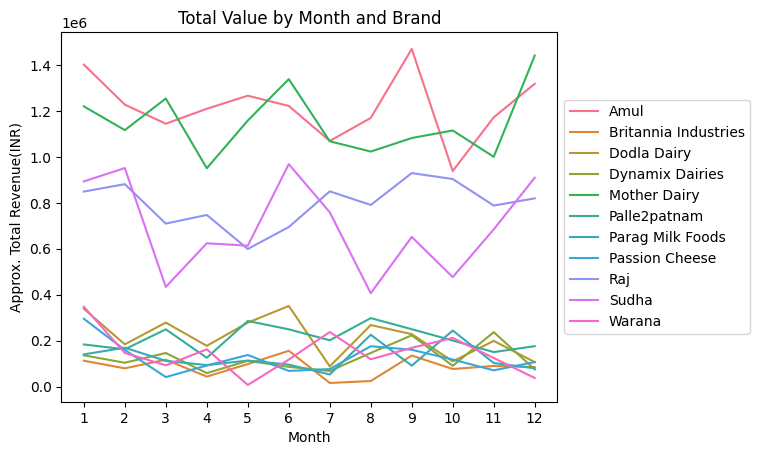

In [ ]:
sns.lineplot(data=monthly_brand_total, x='Month', y='Approx. Total Revenue(INR)', hue='Brand')
plt.title('Total Value by Month and Brand')
plt.xticks(range(1, 13))

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Dropping month and year since EDA is done! <br>
</div>

In [ ]:
#dropping month and year
df.drop(['Month','Year'],axis=1, inplace=True)

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Performing sanity check of the dataframe <br>
</div>

In [ ]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Checking the columns of the dataframe for next step <br>
</div>

In [ ]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
4. Model Selection<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Creating feature and target variables and splitting it into train and test sets <br>
</div>

In [ ]:
# Prepare the data for modeling
X = df.drop(columns=['Approx. Total Revenue(INR)','Price per Unit (sold)','Quantity Sold (liters/kg)'])
y = df['Approx. Total Revenue(INR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Defining the numerical and categorical variables <br>
</div>

In [ ]:
categorical_cols = ['Location', 'Farm Size', 'Product Name', 'Brand', 'Customer Location', 'Sales Channel']
numerical_cols = ['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Price per Unit',
                  'Total Value', 'Shelf Life (days)',
                  'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
                  'Reorder Quantity (liters/kg)']

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code defines a `ColumnTransformer` to perform one-hot encoding on specified categorical features while keeping the remaining features unchanged. The transformer is configured with the `OneHotEncoder` for categorical features and the `'passthrough'` strategy for the remaining features. This allows for preprocessing and encoding of categorical data while preserving the original numerical data. <br>
</div>

In [ ]:
categorical_features = ['Location', 'Product Name', 'Brand', 'Storage Condition', 'Customer Location', 'Sales Channel']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
cat_preprocessor = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code defines a `ColumnTransformer` object named `preprocessor` that applies specific preprocessing steps to categorical and numerical columns in a dataset. The categorical columns are processed using the `cat_preprocessor`, while the numerical columns are processed using the `num_preprocessor`. <br>
</div>

In [ ]:
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, categorical_cols),
    ('num', num_preprocessor, numerical_cols)
])

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code performs preprocessing on the training data (`X_train`) using the preprocessor pipeline (`preprocessor.fit_transform()`), and applies the same preprocessing to the test data (`X_test`) using `preprocessor.transform()`. <br>
</div>

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code normalizes the target variable by applying standard scaling to both the training and test sets, ensuring that the target variable has zero mean and unit variance. <br>
</div>

In [ ]:
scaler = StandardScaler()
y_train_normalized = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler.transform(y_test.values.reshape(-1, 1))

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Base models are defined<br>
</div>

In [ ]:
# Define the base models
base_models = [
    ('linear_regression', LinearRegression()),
    ('decision_tree', DecisionTreeRegressor()),
    ('knn', KNeighborsRegressor())
]

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Stacking, bagging, boosting and voting models are defined in the following code. <br>
</div>

In [ ]:
# Define the stacking ensemble model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Define the bagging ensemble model
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor())

# Define the boosting ensemble model
boosting_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

# Define the voting ensemble model
voting_model = VotingRegressor(estimators=base_models)

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
All models are combined and appended into a list for processing <br>
</div>

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Stacking', stacking_model),
    ('Bagging', bagging_model),
    ('Boosting', boosting_model),
    ('Voting', voting_model)
]

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code performs k-fold cross-validation for multiple models to evaluate their performance in terms of mean squared error (MSE), printing the mean MSE for each model.
 <br>
</div>

In [ ]:
k = 5  # Number of folds
mse_scores = []

for model_name, model in models:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_preprocessed, y_train_normalized.ravel(), cv=cv, scoring='neg_mean_squared_error')
    mse_scores.append((-1) * scores)
    mean_mse = np.mean((-1) * scores)
    print(f'{model_name}: Mean MSE = {mean_mse}')


Linear Regression: Mean MSE = 0.0944792019182595
Decision Tree: Mean MSE = 0.03879328346299727
KNN: Mean MSE = 0.23199649856400092
Stacking: Mean MSE = 0.027886520316115354
Bagging: Mean MSE = 0.015308750422064981
Boosting: Mean MSE = 0.013350435715288503
Voting: Mean MSE = 0.054945720978741605


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code compares the models based on their mean mean squared error (MSE) scores and visualizes the comparison using a boxplot. <br>
</div>

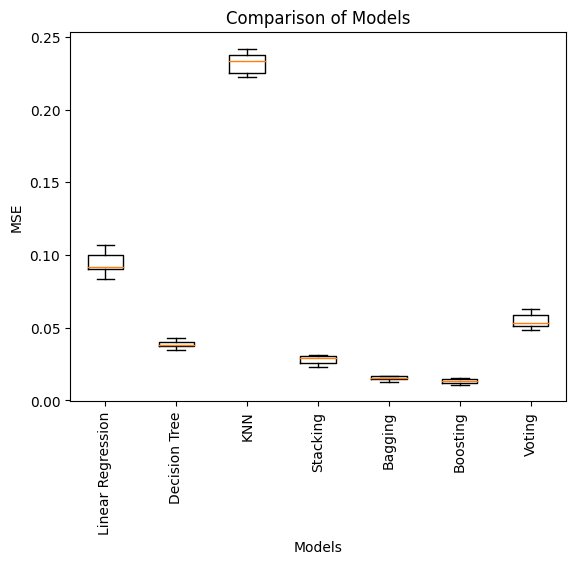

In [ ]:
# Compare the models based on mean MSE
model_names = [model_name for model_name, _ in models]
plt.boxplot(mse_scores, labels=model_names)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title('Comparison of Models')
plt.show()

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
5. Hyperparameter tuning<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
Params grid are defined for each model <br>
</div>

In [ ]:
# Hyperparameter grid for Linear Regression
linear_regression_params = {
    'fit_intercept': [True, False],
}

# Hyperparameter grid for Decision Tree
decision_tree_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Hyperparameter grid for Stacking
stacking_params = {
    'final_estimator__fit_intercept': [True, False],
}

# Hyperparameter grid for Bagging
bagging_params = {
    'n_estimators': [10, 20, 30],
    'base_estimator__max_depth': [None, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10]
}

# Hyperparameter grid for Boosting
boosting_params = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'base_estimator__max_depth': [None, 5],
    'base_estimator__min_samples_split': [10]
}

# Hyperparameter grid for Voting
voting_params = {
    'weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1]]
}


In [ ]:
# Define the parameter grid for each model
param_grids = [
    linear_regression_params,
    decision_tree_params,
    knn_params,
    stacking_params,
    bagging_params,
    boosting_params,
    voting_params
]

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code performs hyperparameter tuning for each model in a given list of models by using GridSearchCV. It prints the best hyperparameters and the corresponding best mean squared error (MSE) for each model. <br>
</div>

In [ ]:
# Perform hyperparameter tuning for each model
best_estimators = []
best_scores = []

for (model_name, model), param_grid in zip(models, param_grids):
    print(f'Tuning hyperparameters for {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=k, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_preprocessed, y_train_normalized.ravel())
    best_estimators.append((model_name, grid_search.best_estimator_))
    best_scores.append((-1) * grid_search.best_score_)
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best Mean MSE: {-1 * grid_search.best_score_}\n')

Tuning hyperparameters for Linear Regression...
Best Parameters: {'fit_intercept': False}
Best Mean MSE: 0.0946265850970234

Tuning hyperparameters for Decision Tree...
Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Best Mean MSE: 0.03531166179250529

Tuning hyperparameters for KNN...
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Mean MSE: 0.22177719352693281

Tuning hyperparameters for Stacking...
Best Parameters: {'final_estimator__fit_intercept': True}
Best Mean MSE: 0.0278637963487789

Tuning hyperparameters for Bagging...
Best Parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 5, 'n_estimators': 30}
Best Mean MSE: 0.012937328976966991

Tuning hyperparameters for Boosting...
Best Parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 10, 'learning_rate': 0.1, 'n_estimators': 50}
Best Mean MSE: 0.013975075557567346

Tuning hyperparameters for Voting...
Best Parameters: {'weights': [1, 2,

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code performs k-fold cross-validation on a set of models, evaluates their performance using mean squared error (MSE), and prints the mean MSE for each model. <br>
</div>

In [ ]:
# Evaluate the best models using k-fold cross-validation
mse_scores = []
for model_name, model in best_estimators:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_preprocessed, y_train_normalized.ravel(), cv=cv, scoring='neg_mean_squared_error')
    mse_scores.append((-1) * scores)
    mean_mse = np.mean((-1) * scores)
    print(f'{model_name}: Mean MSE = {mean_mse}')

Linear Regression: Mean MSE = 0.09447915778795153
Decision Tree: Mean MSE = 0.03720387328800369
KNN: Mean MSE = 0.2175270456477983
Stacking: Mean MSE = 0.027364708468483833
Bagging: Mean MSE = 0.01320431099349897
Boosting: Mean MSE = 0.014279557000710702
Voting: Mean MSE = 0.03943474284995206


<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code compares the performance of different models based on their mean MSE scores and visualizes the comparison using a boxplot. <br>
</div>

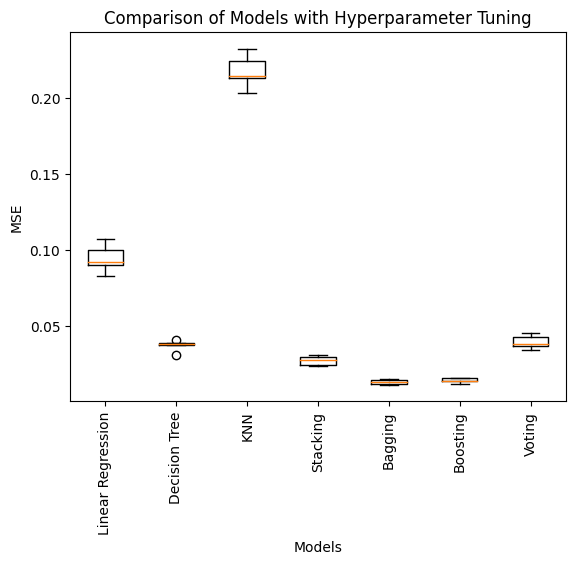

In [ ]:
# Compare the models based on mean MSE
model_names = [model_name for model_name, _ in best_estimators]
plt.boxplot(mse_scores, labels=model_names)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title('Comparison of Models with Hyperparameter Tuning')
plt.show()

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
6. Feature Importances<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
One of the best models which have feature importances are fitted for exploration <br>
</div>

In [ ]:
#fitting the best model
decision_tree= DecisionTreeRegressor().fit(X_train_preprocessed, y_train_normalized.ravel())

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code retrieves the column names used in the ColumnTransformer preprocessing step. It converts the preprocessed training data into a DataFrame. Then, it calculates and prints the feature importances of the decision tree model if available, or it displays a message indicating that the model does not have feature importances. <br>
</div>

In [ ]:
# Retrieve column names from ColumnTransformer
categorical_transformer = preprocessor.named_transformers_['cat']
categorical_feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(input_features=categorical_cols)
feature_names = list(categorical_feature_names) + numerical_cols

# Convert X_train_preprocessed to a DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=feature_names)

# Obtain feature importances
if hasattr(decision_tree, 'feature_importances_'):
    feature_importances = decision_tree.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Print feature importances
    print('Feature Importances for Decision Tree:')
    for i in sorted_indices:
        print(f'{feature_names[i]}: {feature_importances[i]}')
else:
    print('The Decision Tree model does not have feature importances.')

Feature Importances for Decision Tree:
Total Value: 0.6268351536598481
Quantity in Stock (liters/kg): 0.3194798104128909
Quantity (liters/kg): 0.04527182450749845
Price per Unit: 0.00129894552897989
Reorder Quantity (liters/kg): 0.0008727186321758421
Total Land Area (acres): 0.0008285188905836328
Number of Cows: 0.0007913545050084576
Minimum Stock Threshold (liters/kg): 0.000745375640582497
Shelf Life (days): 0.0006060310880247029
Product Name_Lassi: 0.00029897888528894625
Location_Rajasthan: 0.00018065882971100847
Brand_Sudha: 0.00014390363488363432
Sales Channel_Retail: 0.0001410576393464219
Customer Location_Maharashtra: 0.00013913140367006682
Farm Size_Medium: 0.0001228136801838285
Location_Kerala: 0.00011319303666970532
Brand_Dynamix Dairies: 0.00010741321683058782
Sales Channel_Online: 0.0001017464079449869
Farm Size_Large: 9.519190381583376e-05
Sales Channel_Wholesale: 8.896209968681033e-05
Customer Location_Bihar: 8.44067407006595e-05
Location_Maharashtra: 8.083905095398363e-05

<div style="background-color:#91B3E7; color:#19180F; font-size:20px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
7. Model Interpretation<br>
</div>

<div style="background-color:#CCE0FF; color:#19180F; font-size:15px; font-family:Verdana; padding:14px; border: 10px solid #19180F;">
The code performs the following steps:<br>
<br><br>
1. It converts the preprocessed training data (`X_train_preprocessed`) to a NumPy array (`X_train_preprocessed_array`).<br><br>
2. It initializes the SHAP explainer with the decision tree model and the preprocessed training data array.<br><br>
3. It calculates the Shapley values for the training data using the SHAP explainer.<br><br>
4. It visualizes the Shapley values using a summary plot and custom feature names, and displays the plot.<br><br>

The color scheme used in the summary plot can vary depending on the specific implementation and settings. By default, SHAP uses a blue-red color gradient, where blue represents lower feature values and red represents higher feature values.  <br>
</div>

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


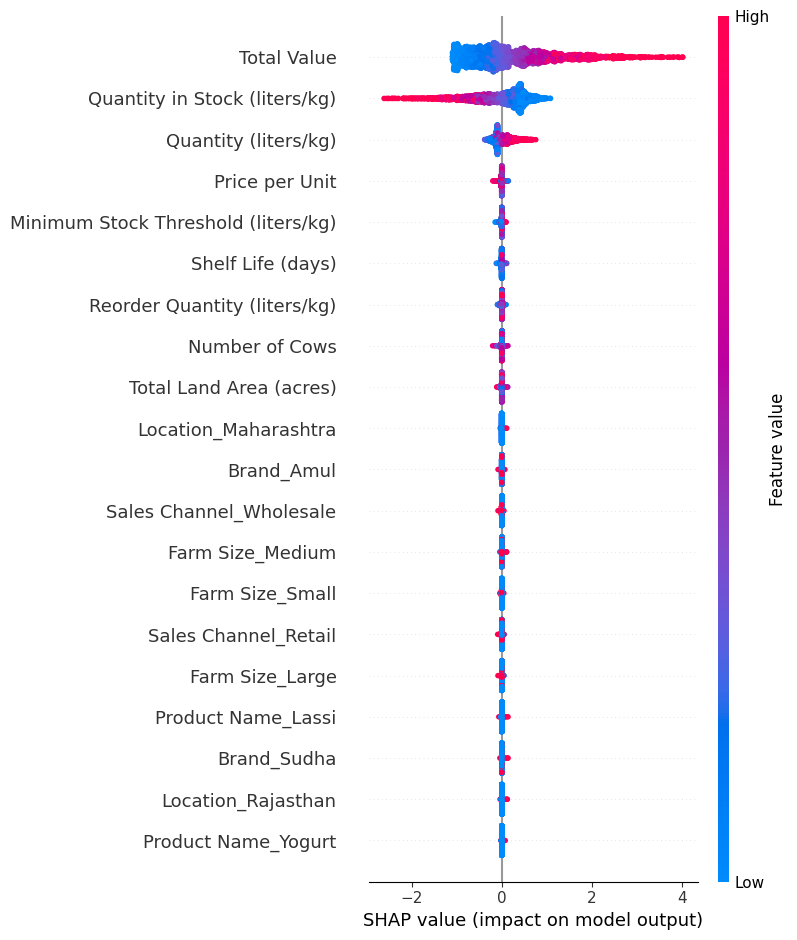

In [ ]:
# Convert X_train_preprocessed to a NumPy array
X_train_preprocessed_array = X_train_preprocessed.toarray()


# Initialize the SHAP explainer with the decision tree model and training data
explainer = shap.Explainer(decision_tree, X_train_preprocessed_array)

# Calculate Shapley values for the test set
shap_values = explainer.shap_values(X_train_preprocessed_array)

# Visualize the Shapley values
shap.summary_plot(shap_values, X_train_preprocessed_array, feature_names=feature_names, show=False)

# Show the plot
plt.show()

#Performance of dairy farms based on location, land area, and cow population

In [ ]:
farm_performance = df.groupby(['Location', 'Total Land Area (acres)', 'Number of Cows']).agg({
    'Quantity Sold (liters/kg)': 'sum',
    'Approx. Total Revenue(INR)': 'sum',
    'Price per Unit (sold)': 'mean'
}).reset_index()

print(farm_performance)

         Location  Total Land Area (acres)  Number of Cows  \
0           Bihar                    11.86              80   
1           Bihar                    20.07              62   
2           Bihar                    22.83              72   
3           Bihar                    26.02              78   
4           Bihar                    27.37              50   
...           ...                      ...             ...   
4320  West Bengal                   967.64              55   
4321  West Bengal                   979.13              52   
4322  West Bengal                   984.53              24   
4323  West Bengal                   987.82              18   
4324  West Bengal                   990.93              39   

      Quantity Sold (liters/kg)  Approx. Total Revenue(INR)  \
0                           228                    10807.20   
1                           620                    10465.60   
2                           464                    16462.72   
3  

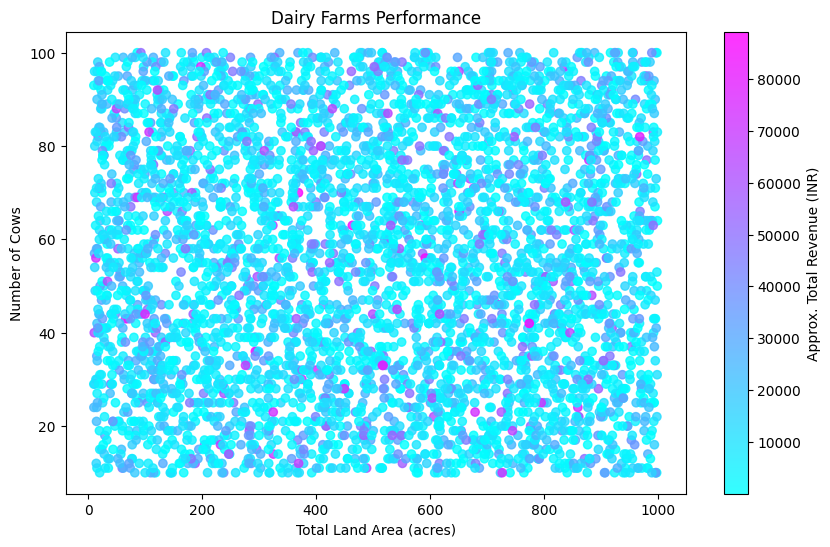

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(farm_performance['Total Land Area (acres)'], farm_performance['Number of Cows'],
            c=farm_performance['Approx. Total Revenue(INR)'], cmap='cool', alpha=0.8)
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Number of Cows')
plt.title('Dairy Farms Performance')
plt.colorbar(label='Approx. Total Revenue (INR)')
plt.show()

#Sales and distribution patterns

In [ ]:
product_sales = df.groupby(['Product Name', 'Brand', 'Location']).agg({
    'Quantity Sold (liters/kg)': 'sum',
    'Approx. Total Revenue(INR)': 'sum'
}).reset_index()

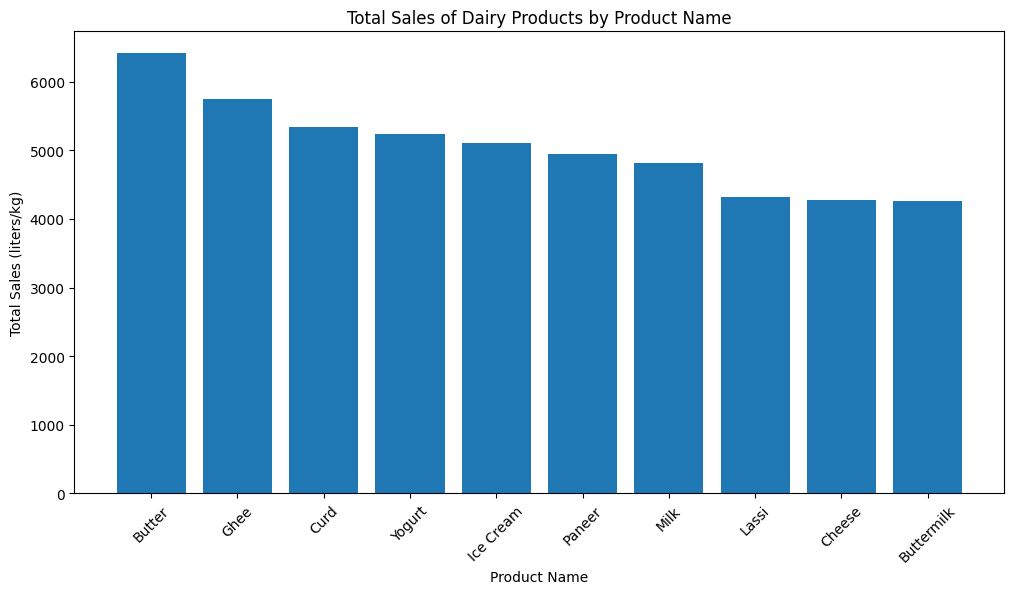

In [ ]:
plt.figure(figsize=(12, 6))
product_sales_sorted = product_sales.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sales_sorted['Product Name'], product_sales_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Product Name')
plt.ylabel('Total Sales (liters/kg)')
plt.title('Total Sales of Dairy Products by Product Name')
plt.xticks(rotation=45)
plt.show()

#Impact of storage conditions and shelf life on the quality and availability of dairy products

In [ ]:
storage_impact = df.groupby(['Storage Condition']).agg({
    'Quantity in Stock (liters/kg)': 'sum'
}).reset_index()

shelf_life_impact = df.groupby(['Shelf Life (days)']).agg({
    'Quantity in Stock (liters/kg)': 'sum'
}).reset_index()

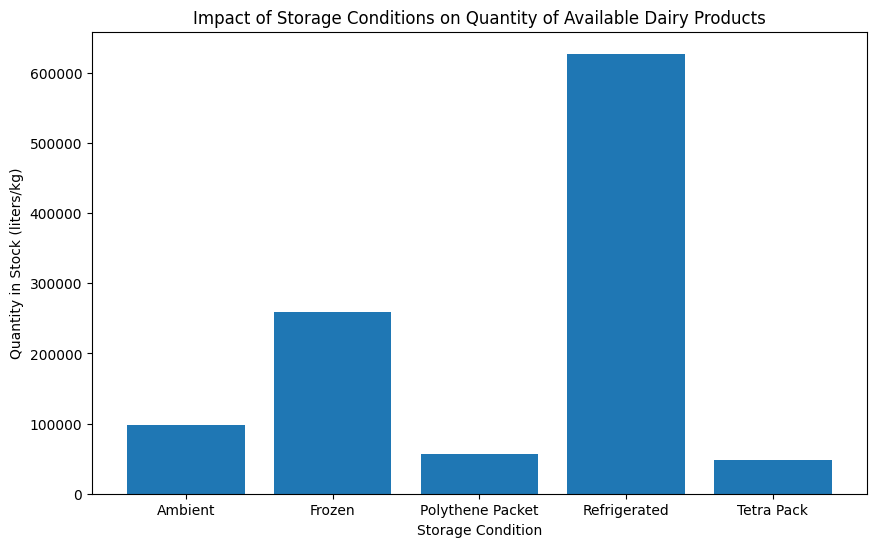

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(storage_impact['Storage Condition'], storage_impact['Quantity in Stock (liters/kg)'])
plt.xlabel('Storage Condition')
plt.ylabel('Quantity in Stock (liters/kg)')
plt.title('Impact of Storage Conditions on Quantity of Available Dairy Products')
plt.show()

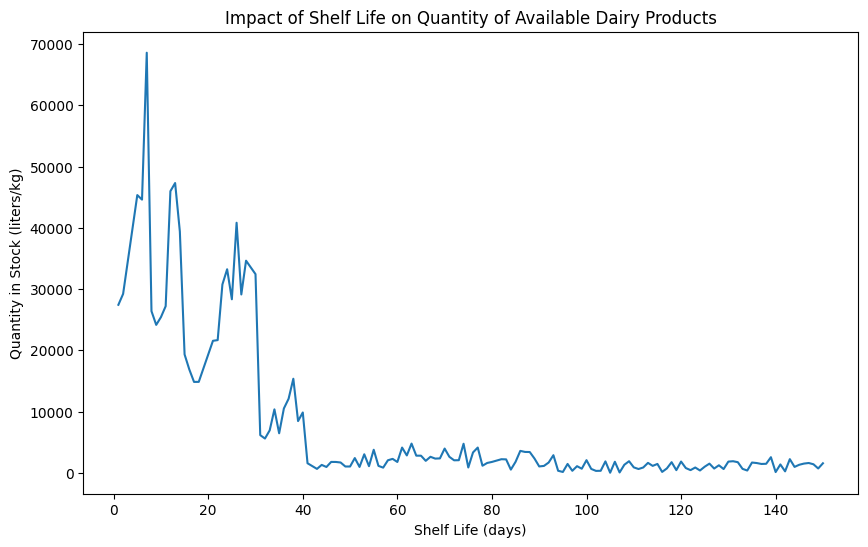

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(shelf_life_impact['Shelf Life (days)'], shelf_life_impact['Quantity in Stock (liters/kg)'])
plt.xlabel('Shelf Life (days)')
plt.ylabel('Quantity in Stock (liters/kg)')
plt.title('Impact of Shelf Life on Quantity of Available Dairy Products')
plt.show()

#Customer preferences and buying behavior based on location and sales channels

In [ ]:
customer_preferences = df.groupby(['Location', 'Sales Channel']).agg({
    'Approx. Total Revenue(INR)': 'sum',
    'Quantity Sold (liters/kg)': 'sum'
}).reset_index()

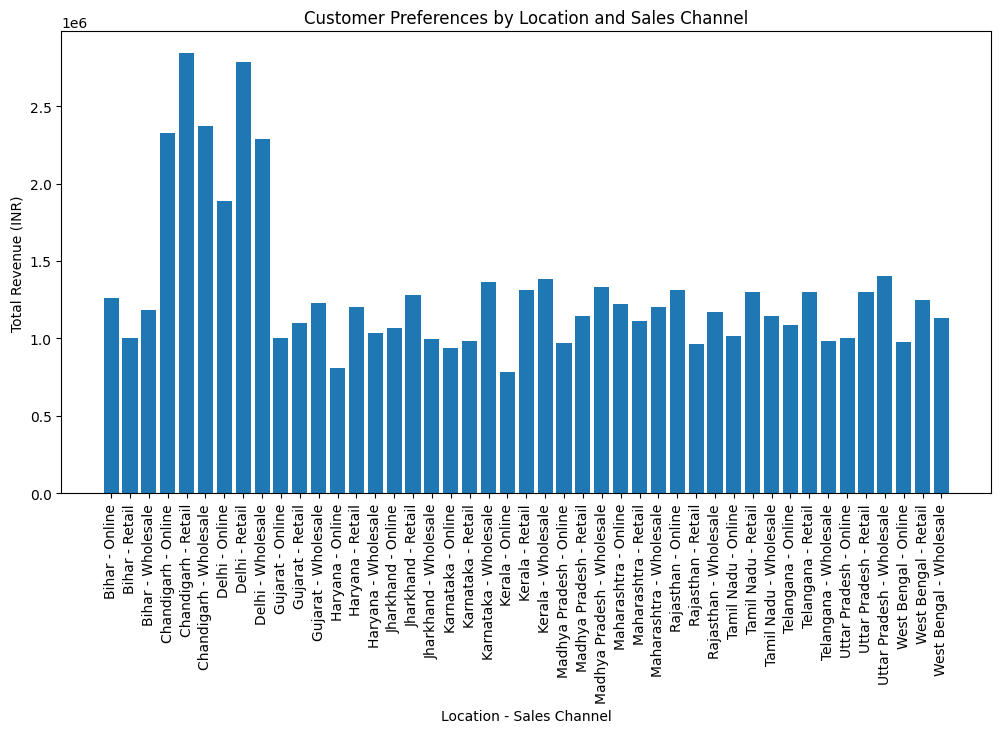

In [ ]:
plt.figure(figsize=(12, 6))
x = customer_preferences['Location'] + ' - ' + customer_preferences['Sales Channel']
plt.bar(x, customer_preferences['Approx. Total Revenue(INR)'])
plt.xlabel('Location - Sales Channel')
plt.ylabel('Total Revenue (INR)')
plt.title('Customer Preferences by Location and Sales Channel')
plt.xticks(rotation=90)
plt.show()

In [ ]:
buying_behavior = df.groupby(['Location', 'Sales Channel']).agg({
    'Quantity Sold (liters/kg)': 'mean',
    'Price per Unit (sold)': 'mean'
}).reset_index()

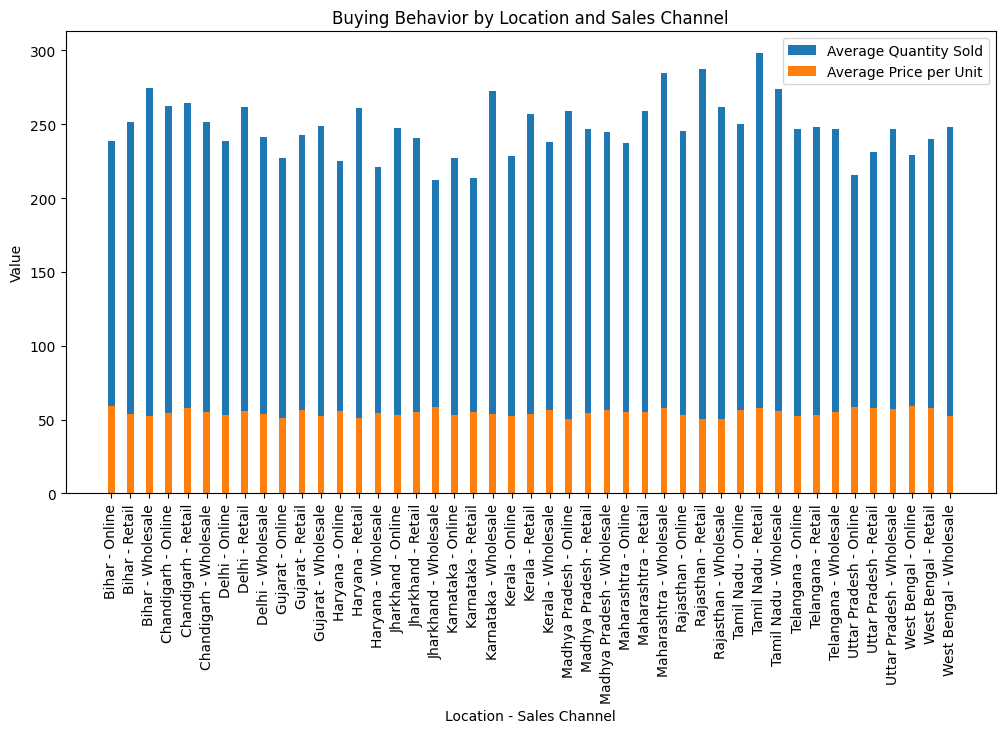

In [ ]:
plt.figure(figsize=(12, 6))
x = buying_behavior['Location'] + ' - ' + buying_behavior['Sales Channel']
width = 0.35
plt.bar(x, buying_behavior['Quantity Sold (liters/kg)'], width, label='Average Quantity Sold')
plt.bar(x, buying_behavior['Price per Unit (sold)'], width, label='Average Price per Unit')
plt.xlabel('Location - Sales Channel')
plt.ylabel('Value')
plt.title('Buying Behavior by Location and Sales Channel')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
inventory_metrics = df.groupby('Product Name').agg({
    'Quantity in Stock (liters/kg)': 'sum',
    'Minimum Stock Threshold (liters/kg)': 'mean',
    'Reorder Quantity (liters/kg)': 'mean'
}).reset_index()

In [ ]:
reorder_products = inventory_metrics[inventory_metrics['Quantity in Stock (liters/kg)'] < inventory_metrics['Minimum Stock Threshold (liters/kg)']]

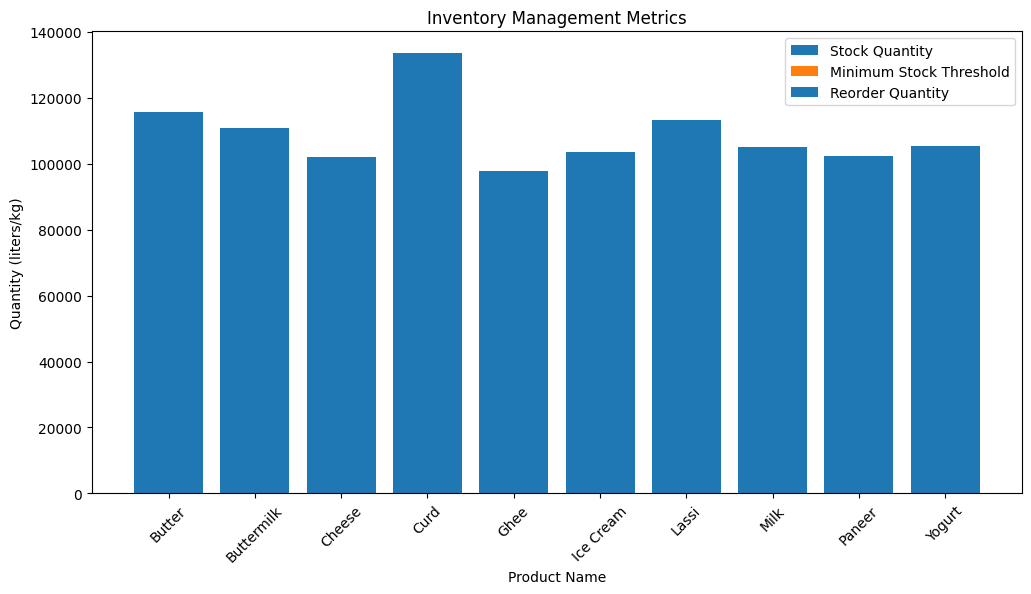

In [ ]:
plt.figure(figsize=(12, 6))
x = inventory_metrics['Product Name']
plt.bar(x, inventory_metrics['Quantity in Stock (liters/kg)'], label='Stock Quantity')
plt.bar(x, inventory_metrics['Minimum Stock Threshold (liters/kg)'], label='Minimum Stock Threshold')
plt.bar(reorder_products['Product Name'], reorder_products['Reorder Quantity (liters/kg)'], label='Reorder Quantity', color='red')
plt.xlabel('Product Name')
plt.ylabel('Quantity (liters/kg)')
plt.title('Inventory Management Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#Trend analysis in the dairy industry

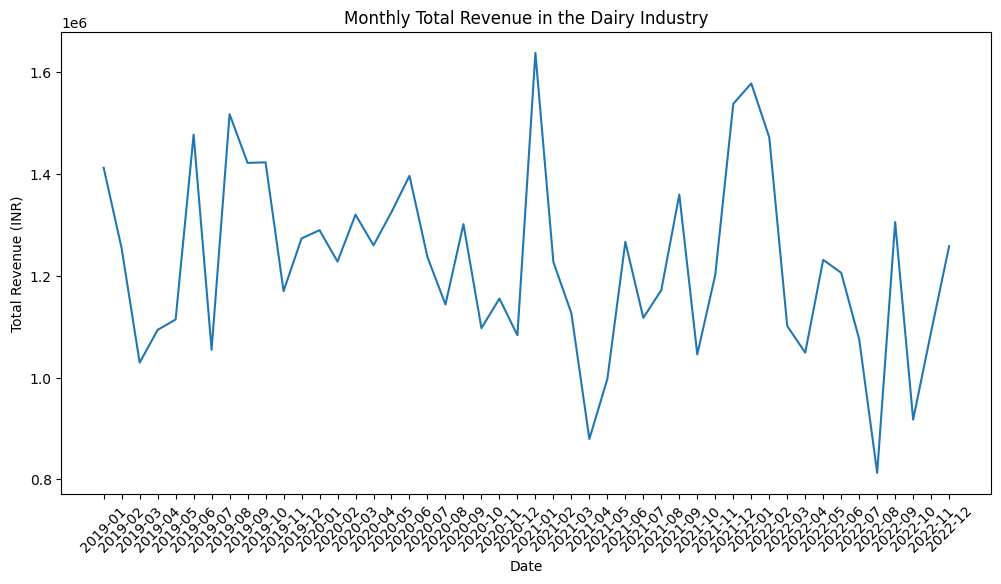

In [ ]:
monthly_revenue = df.groupby(pd.to_datetime(df['Date']).dt.to_period('M')).agg({
    'Approx. Total Revenue(INR)': 'sum'
}).reset_index()

monthly_revenue['Date'] = monthly_revenue['Date'].astype(str)  # Convert 'Date' column back to string format

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Date'], monthly_revenue['Approx. Total Revenue(INR)'])
plt.xlabel('Date')
plt.ylabel('Total Revenue (INR)')
plt.title('Monthly Total Revenue in the Dairy Industry')
plt.xticks(rotation=45)
plt.show()

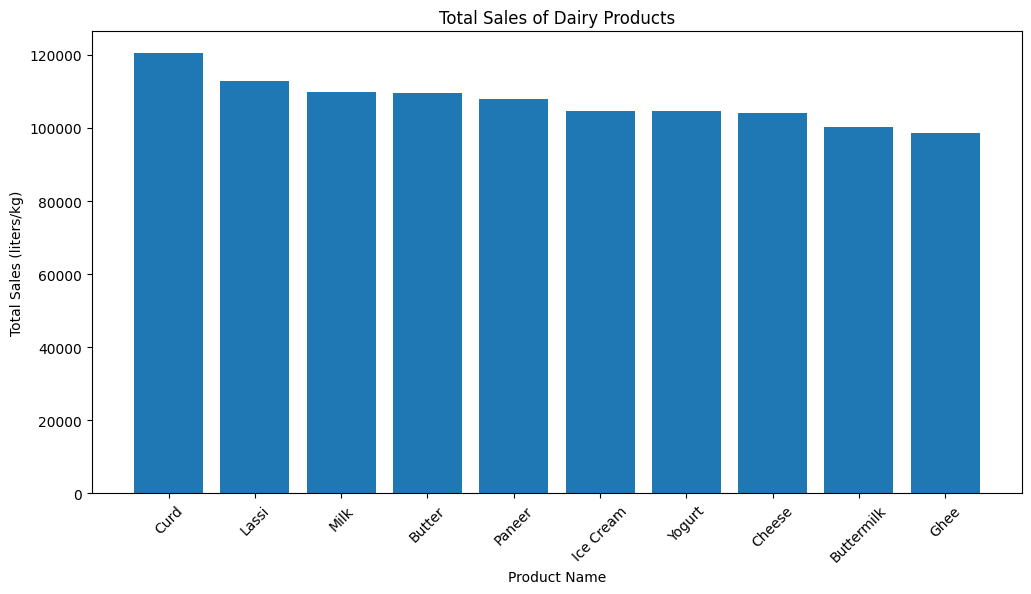

In [ ]:
product_sales = df.groupby('Product Name').agg({
    'Quantity Sold (liters/kg)': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
product_sales_sorted = product_sales.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sales_sorted['Product Name'], product_sales_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Product Name')
plt.ylabel('Total Sales (liters/kg)')
plt.title('Total Sales of Dairy Products')
plt.xticks(rotation=45)
plt.show()

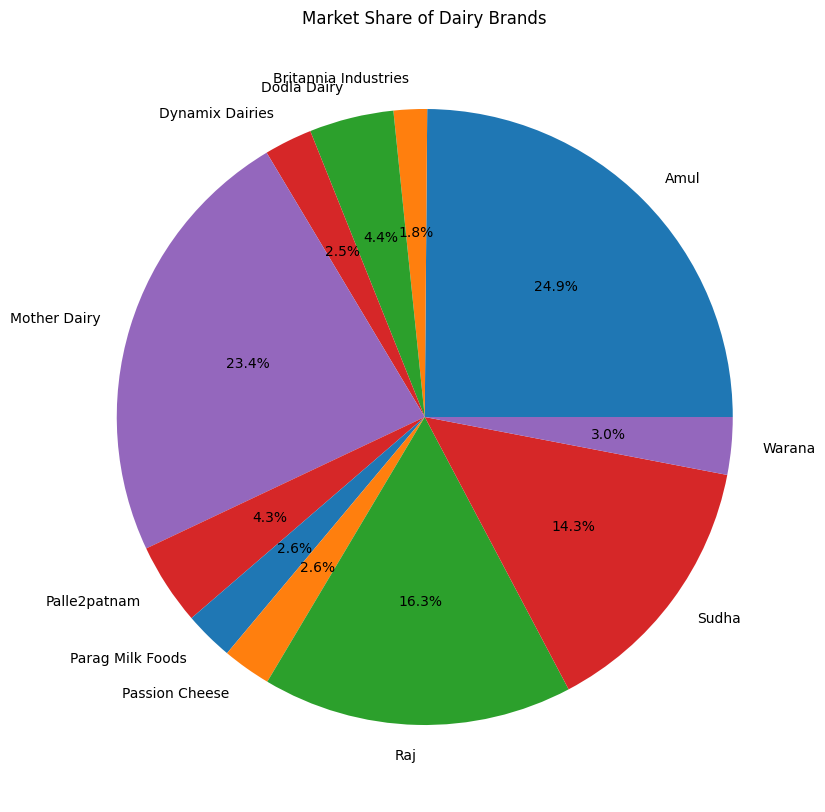

In [ ]:
brand_market_share = df.groupby('Brand').agg({
    'Approx. Total Revenue(INR)': 'sum'
}).reset_index()

plt.figure(figsize=(10, 10))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple' , 'tab:red']  # Specify custom colors

plt.pie(brand_market_share['Approx. Total Revenue(INR)'],
        labels=brand_market_share['Brand'],
        autopct='%1.1f%%',
        colors=colors)
plt.title('Market Share of Dairy Brands')
plt.show()

#Dairy Goods Sales Forecasting for Days Of The Week


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert date columns to proper date format
date_columns = ['Date', 'Production Date', 'Expiration Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Drop irrelevant columns
drop_columns = ['Approx. Total Revenue(INR)', 'Total Value', 'Production Date',
                'Expiration Date','Total Land Area (acres)', 'Number of Cows',
                'Reorder Quantity (liters/kg)', 'Shelf Life (days)', 'Minimum Stock Threshold (liters/kg)',
                'Quantity (liters/kg)']


# drop_columns = ['Product ID', 'Brand', 'Production Date', 'Customer Location', 'Sales Channel']
df.drop(columns=drop_columns, inplace=True)

# Check for missing values and handle if necessary
# df.dropna(inplace=True)

# Convert date columns to proper date format
date_columns = ['Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Extract relevant features from datetime
df['DayOfWeek'] = df['Date'].dt.dayofweek# df['Week'] = df['Date'].dt.week
# Extract month
# df['Month'] = df['Date'].dt.month
# df['Month'] = df['Date'].dt.month
# df['Year'] = df['Date'].dt.year

# Drop the original date columns
df.drop(columns=date_columns, inplace=True)

# Check for missing values and handle if necessary
df.dropna(inplace=True)
# Perform one-hot encoding for the 'Storage Condition' column
df = pd.get_dummies(df, columns=['Storage Condition'], prefix='Is')
df = pd.get_dummies(df, columns=['Customer Location'], prefix='CustomerLocation')
df = pd.get_dummies(df, columns=['Location'], prefix='Location')
df = pd.get_dummies(df, columns=['Product Name'], prefix='Product')
df = pd.get_dummies(df, columns=['Farm Size'], prefix='Farm_Size')
df = pd.get_dummies(df, columns=['Brand'], prefix='Brand')
df = pd.get_dummies(df, columns=['Sales Channel'], prefix='Channel')


# Step 2: Select only the columns to be scaled
columns_to_scale = ["Quantity Sold (liters/kg)", "Quantity in Stock (liters/kg)"]
data_to_scale = df[columns_to_scale]

# Step 3: Scale the data to a common range (between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Step 4: Replace the scaled data in the original DataFrame
df[columns_to_scale] = scaled_data
# Print the first few rows of the preprocessed DataFrame
print(df.columns)
# print(df.head())

Index(['Product ID', 'Price per Unit', 'Quantity Sold (liters/kg)',
       'Price per Unit (sold)', 'Quantity in Stock (liters/kg)', 'DayOfWeek',
       'Is_Ambient', 'Is_Frozen', 'Is_Polythene Packet', 'Is_Refrigerated',
       'Is_Tetra Pack', 'CustomerLocation_Bihar',
       'CustomerLocation_Chandigarh', 'CustomerLocation_Delhi',
       'CustomerLocation_Gujarat', 'CustomerLocation_Haryana',
       'CustomerLocation_Jharkhand', 'CustomerLocation_Karnataka',
       'CustomerLocation_Kerala', 'CustomerLocation_Madhya Pradesh',
       'CustomerLocation_Maharashtra', 'CustomerLocation_Rajasthan',
       'CustomerLocation_Tamil Nadu', 'CustomerLocation_Telangana',
       'CustomerLocation_Uttar Pradesh', 'CustomerLocation_West Bengal',
       'Location_Bihar', 'Location_Chandigarh', 'Location_Delhi',
       'Location_Gujarat', 'Location_Haryana', 'Location_Jharkhand',
       'Location_Karnataka', 'Location_Kerala', 'Location_Madhya Pradesh',
       'Location_Maharashtra', 'Location_Raja

#Train Neural Network with "Quantity Sold (liters/kg)" as output and all other fields except Revenue

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = df

# Extract relevant features and target variable
X = data[['Product ID', 'Price per Unit',
       'Price per Unit (sold)', 'Quantity in Stock (liters/kg)', 'DayOfWeek',
       'Is_Ambient', 'Is_Frozen', 'Is_Polythene Packet', 'Is_Refrigerated',
       'Is_Tetra Pack', 'CustomerLocation_Bihar',
       'CustomerLocation_Chandigarh', 'CustomerLocation_Delhi',
       'CustomerLocation_Gujarat', 'CustomerLocation_Haryana',
       'CustomerLocation_Jharkhand', 'CustomerLocation_Karnataka',
       'CustomerLocation_Kerala', 'CustomerLocation_Madhya Pradesh',
       'CustomerLocation_Maharashtra', 'CustomerLocation_Rajasthan',
       'CustomerLocation_Tamil Nadu', 'CustomerLocation_Telangana','CustomerLocation_Uttar Pradesh', 'CustomerLocation_West Bengal',
       'Location_Bihar', 'Location_Chandigarh', 'Location_Delhi',
       'Location_Gujarat', 'Location_Haryana', 'Location_Jharkhand',
       'Location_Karnataka', 'Location_Kerala', 'Location_Madhya Pradesh',
       'Location_Maharashtra', 'Location_Rajasthan', 'Location_Tamil Nadu',
       'Location_Telangana', 'Location_Uttar Pradesh', 'Location_West Bengal',
       'Product_Butter', 'Product_Buttermilk', 'Product_Cheese',
       'Product_Curd', 'Product_Ghee', 'Product_Ice Cream', 'Product_Lassi',
       'Product_Milk', 'Product_Paneer', 'Product_Yogurt', 'Farm_Size_Large',
       'Farm_Size_Medium', 'Farm_Size_Small', 'Brand_Amul',
       'Brand_Britannia Industries', 'Brand_Dodla Dairy',
       'Brand_Dynamix Dairies', 'Brand_Mother Dairy', 'Brand_Palle2patnam',
       'Brand_Parag Milk Foods', 'Brand_Passion Cheese', 'Brand_Raj',
       'Brand_Sudha', 'Brand_Warana', 'Channel_Online', 'Channel_Retail',
       'Channel_Wholesale']]
y = data['Quantity Sold (liters/kg)']

# Convert categorical variables to one-hot encoding (if needed)
# X = pd.get_dummies(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features (optional but can help improve model performance)
# mean = X_train.mean(axis=0)
# std = X_train.std(axis=0)
# X_train = (X_train - mean) / std
# X_test = (X_test - mean) / std

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression (quantity sold prediction)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error (MSE) on Test Set:", loss)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)

# Calculate evaluation metrics using sklearn.metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE) to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error for ANN (MSE):", mse)
print("Mean Absolute Error for ANN (MAE):", mae)
print("R-squared (R2) Score for ANN :", r2)

Epoch 1/20
87/87 [==============================] - 1s 3ms/step - loss: 5.6507 - val_loss: 0.1817
Epoch 2/20
87/87 [==============================] - 0s 2ms/step - loss: 0.1103 - val_loss: 0.0909
Epoch 3/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0675 - val_loss: 0.0650
Epoch 4/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0600 - val_loss: 0.0720
Epoch 5/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0630
Epoch 6/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0574
Epoch 7/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0553 - val_loss: 0.0562
Epoch 8/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0582
Epoch 9/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0577
Epoch 10/20
87/87 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0649
Epoch 11/20
87/87 [

In [ ]:
#Plot Quantities Sold (Actual vs Pred) to DayOfWeek

28/28 [==============================] - 0s 1ms/step


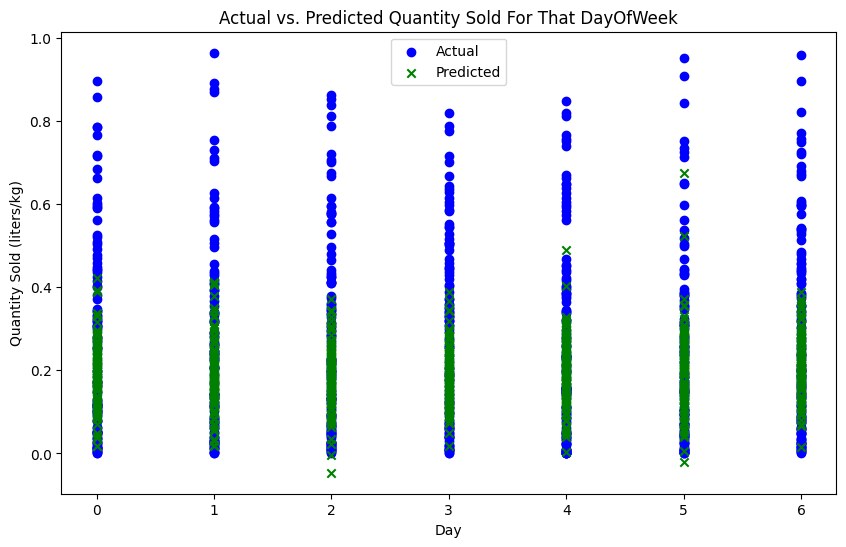

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Make predictions using the model
y_pred = model.predict(X_test)

# Assuming 'X_test' contains the 'Day' column, 'y_test' contains the actual target values, and 'y_pred' contains the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['DayOfWeek'], y_test, label='Actual', color='blue', marker='o')
plt.scatter(X_test['DayOfWeek'], y_pred, label='Predicted', color='green', marker='x')
plt.xlabel('Day')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Actual vs. Predicted Quantity Sold For That DayOfWeek')
plt.legend()
plt.show()

#XGBoost with "Quantity Sold (liters/kg)" as output and all other fields except Revenue

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# # Load the dataset (Assuming you have the dataset in a pandas DataFrame)
# # Replace 'your_dataset.csv' with the actual file path if reading from a CSV file
# df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop('Quantity Sold (liters/kg)', axis=1)
y = df['Quantity Sold (liters/kg)']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define hyperparameters
params = {'objective': 'reg:squarederror',  # 'reg:squarederror' for regression task
    'eta': 0.1,  # Learning rate
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Step 4: Train the XGBoost model
num_rounds = 100  # Number of boosting rounds (iterations)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
model = xgb.train(params, dtrain, num_rounds)

# Step 5: Make predictions on the test set
dtest = xgb.DMatrix(data=X_test)
y_pred = model.predict(dtest)
# Calculate the Root Mean Squared Error (RMSE) to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics using sklearn.metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 0.21808672371253124
Mean Squared Error (MSE): 0.04756181905966593
Mean Absolute Error (MAE): 0.1764685245217602
R-squared (R2) Score: 0.0362544041045324


#Plot Quantities Sold (Actual vs Pred) to DayOfWeek

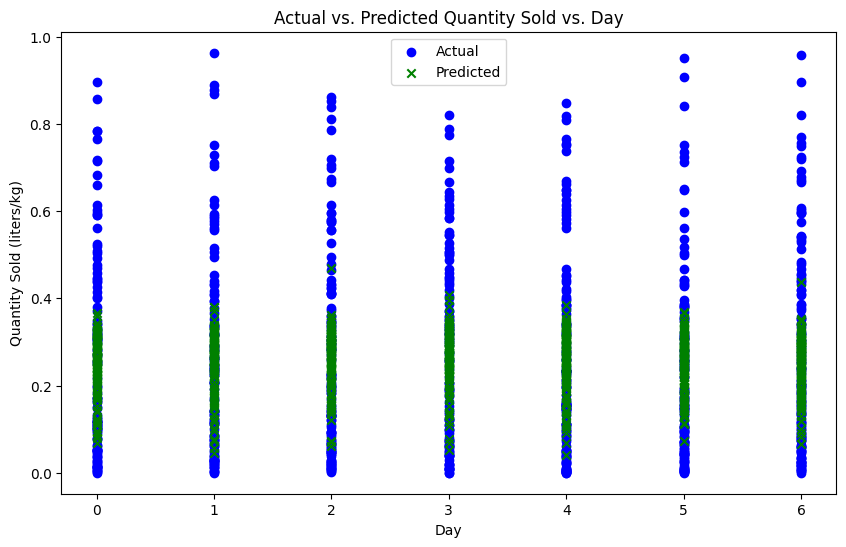

In [ ]:
# Step 5: Make predictions on the test set
dtest = xgb.DMatrix(data=X_test)
y_pred = model.predict(dtest)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(X_test['DayOfWeek'], y_test, label='Actual', color='blue', marker='o')
plt.scatter(X_test['DayOfWeek'], y_pred, label='Predicted', color='green', marker='x')
plt.xlabel('Day')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Actual vs. Predicted Quantity Sold vs. Day')
plt.legend()
plt.show()